# Network Science and Graph Learning main Notebook

This notebook uses various components (from libraries or other files in this directory) to create the illustrations and components used in the `nsgl_macquart_de_terline.pdf` project report.

Import required libraries

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

2.a. We consider the three networks: Caltech, MIT and Johns Hopkins.

We seek to plot the degree distribution for each of these.

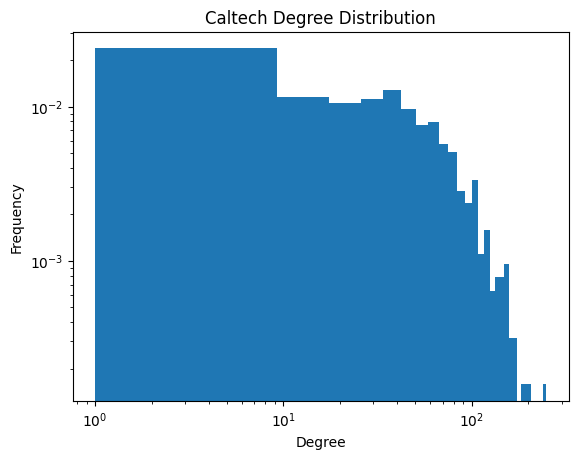

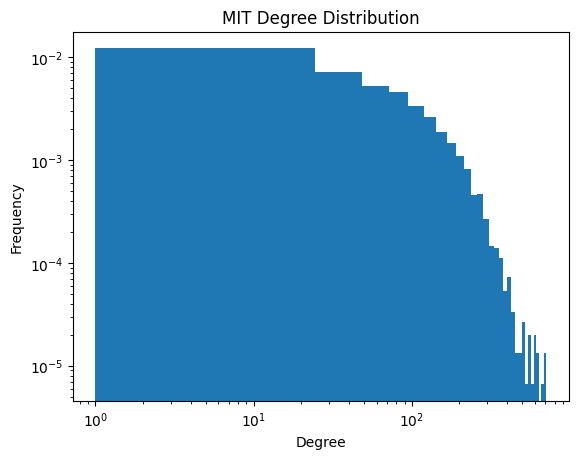

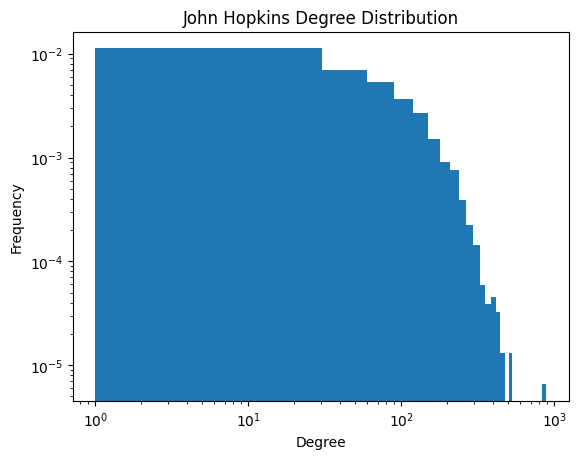

In [ ]:
# Extract the data individually

caltech_gml = 'data/Caltech36.gml'
mit_gml = 'data/MIT8.gml'
john_hopkins_gml = 'data/Johns Hopkins55.gml'

# Load the graphs
caltech_graph = nx.read_gml(caltech_gml)
mit_graph = nx.read_gml(mit_gml)
john_hopkins_graph = nx.read_gml(john_hopkins_gml)

# Function to plot degree distribution
def plot_degree_distribution(graph, title, savefig=True):
    degrees = [degree for node, degree in graph.degree()]
    plt.figure()
    plt.hist(degrees, bins=30, density=True)
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xscale('log')
    if savefig:
        title = title.replace(" ", "_").lower()
        plt.savefig(f'images_buffer/{title}.png')
    plt.show()
    
# Plot degree distributions
plot_degree_distribution(caltech_graph, 'Caltech Degree Distribution')
plot_degree_distribution(mit_graph, 'MIT Degree Distribution')
plot_degree_distribution(john_hopkins_graph, 'John Hopkins Degree Distribution')
    

2.b. Compute the global clustering coeﬃcient and mean local clustering coeﬃcient for each of the 3 networks. In addition compute the edge density of each network.

In [11]:
def network_statistics(network):
    # For the network network, compute the global clustering coefficient, mean local clustering coefficient, and edge density
    return {
        'global_clustering_coefficient': nx.transitivity(network), # same as global clustering coefficient
        'mean_local_clustering_coefficient': nx.average_clustering(network), # mean local clustering coefficient
        'edge_density': nx.density(network) # edge density
    }
    
# Compute statistics for each network
caltech_stats = network_statistics(caltech_graph)
mit_stats = network_statistics(mit_graph)
john_hopkins_stats = network_statistics(john_hopkins_graph)

# Create a latex table with columns (College/University, Global Clustering Coefficient, Mean Local Clustering Coefficient, Edge Density) 
# and rows for each of the three networks through a DataFrame

stats_df = pd.DataFrame({
    'College/University': ['Caltech', 'MIT', 'John Hopkins'],
    'Global Clustering Coefficient': [caltech_stats['global_clustering_coefficient'], mit_stats['global_clustering_coefficient'], john_hopkins_stats['global_clustering_coefficient']],
    'Mean Local Clustering Coefficient': [caltech_stats['mean_local_clustering_coefficient'], mit_stats['mean_local_clustering_coefficient'], john_hopkins_stats['mean_local_clustering_coefficient']],
    'Edge Density': [caltech_stats['edge_density'], mit_stats['edge_density'], john_hopkins_stats['edge_density']]
})

latex_table = stats_df.to_latex(index=False, float_format="%.6f")
print(latex_table)


\begin{tabular}{lrrr}
\toprule
College/University & Global Clustering Coefficient & Mean Local Clustering Coefficient & Edge Density \\
\midrule
Caltech & 0.291283 & 0.409294 & 0.056404 \\
MIT & 0.180288 & 0.271219 & 0.012118 \\
John Hopkins & 0.193161 & 0.268393 & 0.013910 \\
\bottomrule
\end{tabular}



2.c. For each network, we scatter plot the degree versus local clustering coeﬃcient for each network node.

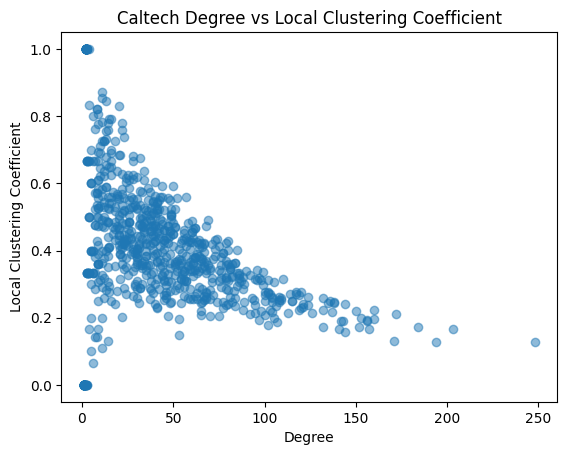

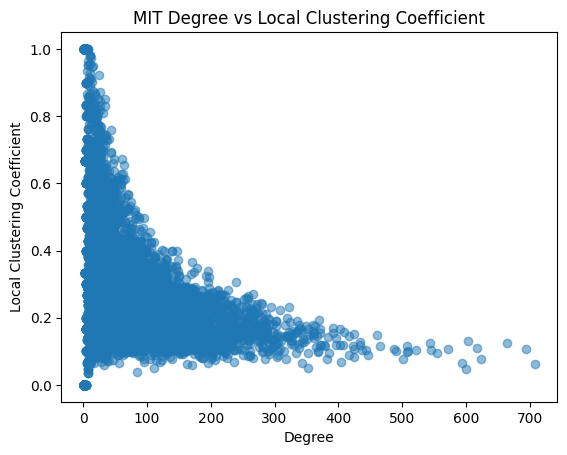

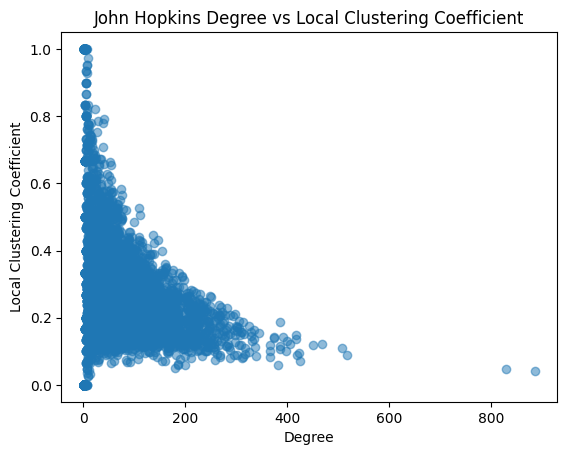

In [13]:
# For each network, plot degree versus local clustering coefficient for each node

def plot_degree_vs_clustering(graph, title, savefig=True):
    degrees = dict(graph.degree())
    clustering_coeffs = nx.clustering(graph)
    
    degree_values = [degrees[node] for node in graph.nodes()]
    clustering_values = [clustering_coeffs[node] for node in graph.nodes()]
    
    plt.figure()
    plt.scatter(degree_values, clustering_values, alpha=0.5)
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Local Clustering Coefficient')
    if savefig:
        title = title.replace(" ", "_").lower()
        plt.savefig(f'images_buffer/{title}.png')
    plt.show()
    
plot_degree_vs_clustering(caltech_graph, 'Caltech Degree vs Local Clustering Coefficient')
plot_degree_vs_clustering(mit_graph, 'MIT Degree vs Local Clustering Coefficient')
plot_degree_vs_clustering(john_hopkins_graph, 'John Hopkins Degree vs Local Clustering Coefficient')